## SVM classifier

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import base
import time
from cvxopt import matrix, solvers, spmatrix, sparse
from scipy.sparse import coo_matrix, csc_matrix, csr_matrix, diags

### Classifier implementation for linearly separable data

In [2]:
class LinSvmOpt(base.LinBase):
    def __init__(self, **kwargs):
        super(LinSvmOpt, self).__init__(**kwargs)
        self.sv_inds = None
        
    def fit(self, X, y, is_sparse):
        sol = self.sepLin(X, y, is_sparse)
        self.coef_ = np.array(sol['x'])[:X.shape[1]].reshape(-1)
        self.intercept_ = np.array(sol['x'])[X.shape[1], 0]
        self.sv_inds = np.where(np.array(sol['z']) > 1e-2)[0]
        
    def sepLin(self, X, y, is_sparse):
        [n, m] = X.shape
        X_ = np.hstack((X, np.ones((n, 1))))
        G = matrix(-(np.array([[iy] for iy in y]).dot(np.ones((1, m+1)))) * X_)
        h = matrix(-np.ones((n, 1)))
        q = matrix(np.zeros((m+1, 1)))
        P = np.eye(m+1)
        P[0, 0] = 0
        P = matrix(P)
        if is_sparse:
            G = sparse(G)
            P = sparse(P)
        sol = solvers.qp(P, q, G, h)
        return(sol)

### Testing a classifier

In [3]:
m, n = 1000, 2
X = np.random.rand(m, n)
y = (X.dot([1, 1]) > 1) * 2 - 1

In [4]:
clf = LinSvmOpt()
clf.set_params({"class_labels_": [-1, 1]})
tic = time.time()
clf.fit(X, y, False)
toc = time.time()
print(f"Coef: {clf.coef_}")
print(f"Intercept: {clf.intercept_}")
print(f"Time: {toc-tic}(s)")
unique, counts = np.unique(clf.predict(X) == y, return_counts=True)
if unique.shape[0] != 1:
    score = counts[1] / (np.sum(counts))
elif unique[0] == False:
    score = 0
else:
    score = 1
print(f"Score: {score}")

     pcost       dcost       gap    pres   dres
 0:  4.0299e+00  9.9328e+02  4e+03  2e+00  5e+02
 1:  3.0333e+01  1.3585e+02  2e+03  1e+00  2e+02
 2:  3.1041e+01  9.7053e+02  2e+03  1e+00  2e+02
 3:  3.1070e+01  1.1959e+03  2e+03  1e+00  2e+02
 4:  3.1336e+01  2.5876e+03  2e+03  1e+00  2e+02
 5:  3.4675e+01  2.9081e+04  2e+03  1e+00  2e+02
 6:  7.2188e+01  6.8483e+05  8e+03  1e+00  2e+02
 7:  3.5974e+02  2.8737e+06  3e+04  1e+00  2e+02
 8:  4.1525e+03  3.0271e+06  5e+04  1e+00  2e+02
 9:  4.1435e+04  5.8007e+06  2e+05  1e+00  2e+02
10:  2.0884e+06  2.5577e+07  4e+06  1e+00  2e+02
11:  4.0432e+07  8.8154e+07  4e+07  7e-01  1e+02
12:  9.7744e+07  1.0620e+08  7e+06  7e-02  2e+01
13:  1.0657e+08  1.0666e+08  7e+04  7e-04  2e-01
14:  1.0666e+08  1.0666e+08  7e+02  7e-06  8e-03
15:  1.0666e+08  1.0666e+08  7e+00  7e-08  1e-02
16:  1.0666e+08  1.0666e+08  7e-02  7e-10  1e-02
17:  1.0666e+08  1.0666e+08  7e-04  7e-12  1e-02
18:  1.0666e+08  1.0666e+08  7e-06  1e-12  2e-02
19:  1.0666e+08  1.06

In [5]:
clf = LinSvmOpt()
clf.set_params({"class_labels_": [-1, 1]})
tic = time.time()
clf.fit(X, y, True)
toc = time.time()
print(f"Coef: {clf.coef_}")
print(f"Intercept: {clf.intercept_}")
print(f"Time: {toc-tic}(s)")
unique, counts = np.unique(clf.predict(X) == y, return_counts=True)
if unique.shape[0] != 1:
    score = counts[1] / (np.sum(counts))
elif unique[0] == False:
    score = 0
else:
    score = 1
print(f"Score: {score}")

     pcost       dcost       gap    pres   dres
 0:  4.0299e+00  9.9328e+02  4e+03  2e+00  5e+02
 1:  3.0333e+01  1.3585e+02  2e+03  1e+00  2e+02
 2:  3.1041e+01  9.7053e+02  2e+03  1e+00  2e+02
 3:  3.1070e+01  1.1959e+03  2e+03  1e+00  2e+02
 4:  3.1336e+01  2.5876e+03  2e+03  1e+00  2e+02
 5:  3.4675e+01  2.9081e+04  2e+03  1e+00  2e+02
 6:  7.2188e+01  6.8483e+05  8e+03  1e+00  2e+02
 7:  3.5974e+02  2.8737e+06  3e+04  1e+00  2e+02
 8:  4.1525e+03  3.0271e+06  5e+04  1e+00  2e+02
 9:  4.1435e+04  5.8007e+06  2e+05  1e+00  2e+02
10:  2.0884e+06  2.5576e+07  4e+06  1e+00  2e+02
11:  4.0434e+07  8.8155e+07  4e+07  7e-01  1e+02
12:  9.7744e+07  1.0620e+08  7e+06  7e-02  2e+01
13:  1.0657e+08  1.0666e+08  7e+04  7e-04  4e-01
14:  1.0666e+08  1.0666e+08  7e+02  7e-06  7e-03
15:  1.0666e+08  1.0666e+08  7e+00  7e-08  8e-03
16:  1.0666e+08  1.0666e+08  7e-02  7e-10  3e-03
17:  1.0666e+08  1.0666e+08  7e-04  7e-12  8e-03
18:  1.0666e+08  1.0666e+08  7e-06  1e-12  1e-02
19:  1.0666e+08  1.06

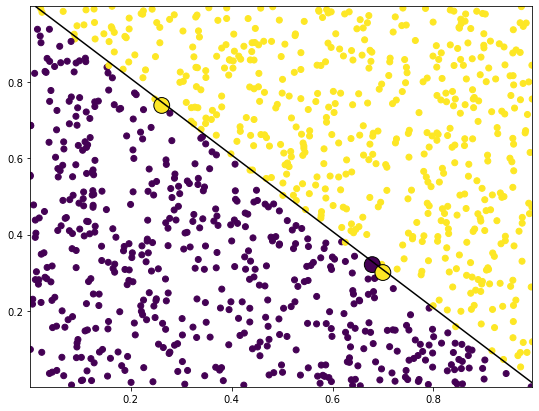

In [6]:
def plot_class(X, y, clf):
    [x1, x2] = np.meshgrid(np.linspace(np.nanmin(X[:, 0]), np.nanmax(X[:, 0]), 50), np.linspace(np.nanmin(X[:, 1]), np.nanmax(X[:, 1]), 50))
    y1 = clf.predict(np.array([x1.ravel(), x2.ravel()]).T)
    y1 = np.reshape(y1, (50, 50))
    plt.figure(figsize=(9, 7))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(X[clf.sv_inds, 0], X[clf.sv_inds, 1], s=250, edgecolors='k', c=y[clf.sv_inds])
    plt.contour(x1, x2, y1, [0, 1], colors='k')  
    plt.show()
    
plot_class(X, y, clf)

### Implementation of a classifier for nonlinearly separable data

In [7]:
from scipy.sparse import coo_matrix

class LinSvm(base.LinBase):
    def __init__(self, **kwargs):
        super(LinSvm, self).__init__(**kwargs)
        self.sv_inds = None

    def fit(self, X, y, is_sparse, C):
        sol = self.sepNonLin(X, y, is_sparse, C)
        self.coef_ = np.array(sol['x'])[:X.shape[1]].reshape(-1)
        self.intercept_ = np.array(sol['x'])[X.shape[1], 0]
        self.sv_inds = np.where(np.array(sol['z']) > 5e-1)[0]
    
    def sepNonLin(self, X, y, is_sparse, C):
        [n, m] = X.shape
        X_ = np.hstack((X, np.ones((n, 1))))
        G = np.hstack(((np.array([[iy] for iy in y]).dot(np.ones((1, m+1)))) * X_, np.eye(n)))
        G = matrix(-np.vstack((G, np.eye(n, n+m+1, k=m+1))))
        h = matrix(np.vstack((-np.ones((n, 1)), np.zeros((n, 1)))))
        q = matrix(np.zeros((m+1+n, 1)))
        P = np.vstack((np.eye(m, m+n+1), np.eye(n+1, m+n+1, m) * C))
        P[m, m] = 0
        P = matrix(P)
        if is_sparse:
            G = sparse(G)
            P = sparse(P)
        sol = solvers.qp(P, q, G, h)
        return(sol)

### Testing a classifier

In [8]:
m, n = 2000, 2
X = np.random.rand(m, n)
y = (X.dot([1, 1]) > 1) * 2 - 1
X += np.random.normal(0, 0.05, size=(m, n))

# from sklearn.datasets import make_blobs
# X, y = make_blobs(n_samples=30, centers=2, n_features=2)

In [9]:
clf = LinSvm()
clf.set_params({"class_labels_": [-1, 1]})
for c in [1, 50, 100, 300]:
    tic = time.time()
    clf.fit(X, y, False, c)
    toc = time.time()
    print(f"Coef: {clf.coef_}")
    print(f"Intercept: {clf.intercept_}")
    print(f"Time: {toc-tic}(s)")
    unique, counts = np.unique(clf.predict(X) == y, return_counts=True)
    if unique.shape[0] != 1:
        score = counts[1] / (np.sum(counts))
    elif unique[0] == False:
        score = 0
    else:
        score = 1
    print(f"Score: {score}")
    print("________________________________________________\n")

     pcost       dcost       gap    pres   dres
 0:  4.2115e+01  8.2799e+02  1e+04  3e+00  9e+02
 1:  7.7164e+02 -1.1102e+03  2e+03  3e-01  1e+02
 2:  3.4782e+02 -9.0129e+00  4e+02  2e-02  5e+00
 3:  2.0787e+02  1.5604e+02  5e+01  1e-03  3e-01
 4:  1.8939e+02  1.8081e+02  9e+00  7e-05  2e-02
 5:  1.8634e+02  1.8493e+02  1e+00  5e-06  2e-03
 6:  1.8583e+02  1.8560e+02  2e-01  3e-07  1e-04
 7:  1.8574e+02  1.8571e+02  4e-02  1e-08  5e-06
 8:  1.8573e+02  1.8572e+02  5e-03  4e-10  1e-07
 9:  1.8573e+02  1.8573e+02  8e-04  2e-12  5e-10
10:  1.8573e+02  1.8573e+02  1e-04  8e-16  2e-11
Optimal solution found.
Coef: [5.45987111 5.48298513]
Intercept: -5.450675907819139
Time: 4.355060338973999(s)
Score: 0.9515
________________________________________________

     pcost       dcost       gap    pres   dres
 0:  1.0155e+01  2.0602e+03  2e+04  3e+00  1e+03
 1:  9.8000e+01 -6.1530e+01  1e+04  2e+00  8e+02
 2:  1.3825e+03  8.2673e+02  1e+04  1e+00  4e+02
 3:  6.1403e+03  4.9815e+03  5e+03  3e-01  

In [10]:
clf = LinSvm()
clf.set_params({"class_labels_": [-1, 1]})
for c in [1, 50, 100, 300]:
    tic = time.time()
    clf.fit(X, y, True, c)
    toc = time.time()
    print(f"Coef: {clf.coef_}")
    print(f"Intercept: {clf.intercept_}")
    print(f"Time: {toc-tic}(s)")
    unique, counts = np.unique(clf.predict(X) == y, return_counts=True)
    if unique.shape[0] != 1:
        score = counts[1] / (np.sum(counts))
    elif unique[0] == False:
        score = 0
    else:
        score = 1
    print(f"Score: {score}")
    print("________________________________________________\n")

     pcost       dcost       gap    pres   dres
 0:  4.2115e+01  8.2799e+02  1e+04  3e+00  9e+02
 1:  7.7164e+02 -1.1102e+03  2e+03  3e-01  1e+02
 2:  3.4782e+02 -9.0129e+00  4e+02  2e-02  5e+00
 3:  2.0787e+02  1.5604e+02  5e+01  1e-03  3e-01
 4:  1.8939e+02  1.8081e+02  9e+00  7e-05  2e-02
 5:  1.8634e+02  1.8493e+02  1e+00  5e-06  2e-03
 6:  1.8583e+02  1.8560e+02  2e-01  3e-07  1e-04
 7:  1.8574e+02  1.8571e+02  4e-02  1e-08  5e-06
 8:  1.8573e+02  1.8572e+02  5e-03  4e-10  1e-07
 9:  1.8573e+02  1.8573e+02  8e-04  2e-12  4e-10
10:  1.8573e+02  1.8573e+02  1e-04  7e-16  8e-11
Optimal solution found.
Coef: [5.45987111 5.48298513]
Intercept: -5.450675907805596
Time: 0.716036319732666(s)
Score: 0.9515
________________________________________________

     pcost       dcost       gap    pres   dres
 0:  1.0155e+01  2.0602e+03  2e+04  3e+00  1e+03
 1:  9.8000e+01 -6.1530e+01  1e+04  2e+00  8e+02
 2:  1.3825e+03  8.2673e+02  1e+04  1e+00  4e+02
 3:  6.1403e+03  4.9815e+03  5e+03  3e-01  

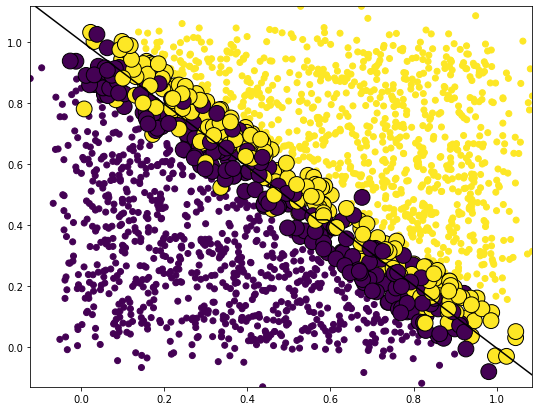

In [11]:
plot_class(X, y, clf)

In [12]:
import pandas as pd
from scipy.io import arff

def fun(x):
    if type(x) == bytes:
        return str(x, encoding='utf-8')
    else:
        return x

data, meta = arff.loadarff("sonar.arff")
df = pd.DataFrame(data)
df = df.applymap(fun)
df[(df != None).all(axis=1) ]
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1])
y = (y == y[0]) * 1

In [14]:
clf = LinSvmOpt()
clf.set_params({"class_labels_": [-1, 1]})
tic = time.time()
clf.fit(X, y, False)
toc = time.time()
print(f"Coef: {clf.coef_}")
print(f"Intercept: {clf.intercept_}")
print(f"Time: {toc-tic}(s)")
unique, counts = np.unique(clf.predict(X) == y, return_counts=True)
if unique.shape[0] != 1:
    score = counts[1] / (np.sum(counts))
elif unique[0] == False:
    score = 0
else:
    score = 1
print(f"Score: {score}")

     pcost       dcost       gap    pres   dres
 0:  1.8618e-01  2.3736e+02  5e+02  2e+00  3e+02
 1:  3.7711e-01  5.3443e+02  1e+02  1e+00  2e+02
 2:  3.8014e-01  5.9468e+04  1e+02  1e+00  2e+02
 3:  3.8017e-01  5.8940e+08  7e+02  1e+00  2e+02
 4:  3.8017e-01  5.8351e+14  6e+06  1e+00  2e+02
 5:  3.8017e-01  5.7767e+22  6e+12  1e+00  2e+02
 6:  3.8017e-01  5.7190e+32  6e+20  1e+00  2e+02
 7:  3.8017e-01  5.6619e+44  6e+30  1e+00  2e+02
 8:  3.8017e-01  5.6812e+58  6e+42  1e+00  2e+02
 9:  3.8017e-01  4.7863e+74  5e+56  1e+00  2e+02
10:  5.2877e-01  4.4897e+110  4e+92  7e-01  1e+01
11:  2.6687e-01  3.7154e+146  4e+128  7e-01  2e+00
12:  5.4589e-02  3.1809e+182  4e+184  8e+01  2e-01
13:  2.2826e-02  3.1809e+182  4e+184  8e+01  2e-01
14:  6.6622e-03  3.1809e+182  4e+184  8e+01  2e-01
15:  1.5798e-02  3.1809e+182  4e+184  8e+01  2e-01
16:  6.0588e-03  3.1809e+182  4e+184  8e+01  2e-01
17:  2.1486e-06  3.2361e+182  4e+182  2e+00  5e-03
18:  4.8153e-07  7.5551e+182  9e+180  7e-01  2e-03
19: 